<h1 style="color:SlateBlue"> At the Scene of the Crime </h1>
<h2> A Comprehensive Analysis of Crime Data in Washington DC </h2>
<h4> Group 03: TerpIQ - Helena Getachew, Xinming Tan, Poojaa Ravi Kumar, Rajat Rautan, Aniket Chafekar, Adit Pawar, Shivam Shivam </h4>


<center><img src="https://th.bing.com/th/id/R.94efbd62bdae0595ab0eb22d046d2540?rik=fgjR%2bfAeo19Sew&riu=http%3a%2f%2flowres.cartoonstock.com%2flaw-order-crime-criminal-thief-crime_prevention-crime_victims-ktan327_low.jpg&ehk=19rEsDm60mbLFW3%2bm9bf6CgWHPrKis6VYWMV8XOVmdY%3d&risl=&pid=ImgRaw&r=0" alt="Girl in a jacket" width="500" height="600"></center>

<h3 style="color:SlateBlue"> Introduction </h3>
<p>

This project aims to uncover potential patterns or relationships associated with crime in Washington D.C. We will utilize a comprehensive dataset on D.C. crime to gain insights into various factors that may influence criminal activities.

The significance of this analysis lies in its connection to the overarching importance of public safety. The prevalent "tough on crime" stance often seen in politicians' platforms reflects civilians' concerns about the handling of criminal incidents.

Moreover, our decision to analyze Washington D.C. is grounded in its allure as a tourist destination and as a desired residence in a bustling metropolitan area. According to 2022 Census data, the nation’s capital is home to 671,803 residents (U.S. Census Bureau quickfacts: District of Columbia, 2022). Our concern arises from the high population density, suggesting that Washington D.C. may be a hotspot for crime compared to smaller, more isolated towns. Thus, effective crime control is paramount to ensuring the safety of both local residents and tourists. Understanding crime patterns becomes pivotal in developing strategies to mitigate risks and safeguard the well-being of all stakeholders.

During our analysis, our primary focus was on providing tangible value to our stakeholders. We aim for these stakeholders to leverage the extrapolations from this project to craft impactful, data-driven solutions for crime reduction and personal safety. The initial stakeholder we considered was law enforcement. The ability to offer insights into where and when crimes occur more frequently can assist the police in allocating resources more effectively. Identifying crime hotspots through data analysis enables the optimization of patrols and interventions.

The second stakeholder we addressed was Washington D.C. government officials. By delivering a robust analysis of key indicators contributing to crime, we intend to inform policymakers about implementing solutions that address the root causes of crime, thereby instating preventative measures. Additionally, enhanced public safety can make D.C. more appealing to tourists, fostering increased economic opportunities for the city. D.C. government officials would be highly invested in initiatives that contribute to building upon its already strong tourism sector.

Our third stakeholder group consists of civilians, including community members and tourists. Aiming to elevate community awareness, our analysis findings can empower citizens to be more vigilant about their personal safety. Knowledge of when and where crime is more prevalent enables civilians to take precautionary measures that ultimately enhance their safety. Safety is a communal effort, and it is crucial for people to be well-informed about the incidence of crime in their areas. We hope that this analysis can contribute to increased community involvement, thereby improving overall safety.
</p>

<h3 style="color:SlateBlue"> Research Question </h3>

1. Are there specific geographic hotspots for crime in Washington D.C.?
2. Is there a correlation between the density of alcohol outlets and crime in D.C.?
3. How do socioeconomic factors such as income levels, unemployment rates, and education levels correlate with crime rates in different areas of Washington D.C.?
4. Does the temperature of the day have an impact on the number of crimes?
5. Is there an association between the time of day a crime occurred and the type of crime?
6. Can we predict future crime rates or hotspots based on historical data and identified patterns?

<h3 style="color:SlateBlue"> Data Sets </h3>

**DC Crime Dataset**
The Washington DC Crime Dataset was published on Kaggle and contains details about reported crimes that occurred from October 2022 to October 2023.

Source: https://www.kaggle.com/datasets/karnikakapoor/crime-incidents-in-dc/data

**Liquor Licenses in DC Dataset**
Since we are also interested in a potential association between the prevalence of alcohol outlets on crime occurrence in Washington DC, a second dataset was obtained from Open Data DC entitled “Liquor Licenses.” The Liquor Licenses dataset contains 2,300 records and 41 variables. We are most interested in the location of these liquor stores so that we can assess if there is a relationship between the number of alcohol outlets in aparticular area and crime within that area.

Source: https://opendata.dc.gov/datasets/liquor-licenses/explore?location=38.819686%2C-76.814256%2C9.41 
</br>
Permissions: https://creativecommons.org/licenses/by/4.0/

**Weather Data**
We are also interested in the relationship between daily temperatures and crime occurrence. Thus, we will be using National Weather Service (NWS) data that contains average daily temperature reports from 2022 to 2023 (365 records). We will assign these temperatures to the corresponding crime date to evaluate this relationship.

Source: https://www.weather.gov/wrh/Climate?wfo=lwx
</br>
Permissions:The NOAA datasets made available through NODD are free for all users to access with no use restrictions and do not require any registration to access. The data is fully open for public access and can be downloaded with no egress charges.

**Socio-economic Characteristics by Ward dataset**
Finally, to evaluate the relationship between socioeconomic characteristics and crime, we will be using the American Community Survey (ACS) on Economic Characteristics by Ward dataset. The ACS dataset has unemployment rates and household income data for each ward in DC. There are 8 observations, which correspond to the 8 wards in DC, and 142 variables.
 
Source: https://opendata.dc.gov/datasets/DCGIS::acs-economic-characteristics-dc-census-tract/about
</br>
Permissions: https://creativecommons.org/licenses/by/4.0/

### We want to be heavily graded on Data Analysis 
In our data analysis, We went beyond basic methodologies by implementing  statistical models and predictive modelling algorithms to uncover nuanced patterns and correlations. Additionally, we integrated diverse datasets, ensuring a comprehensive approach that provides insights beyond the scope of conventional analyses.

### Data Acquisition, Cleaning Code & EDA

<h3 style="color:SlateBlue">1. DC Crime dataset</h3>

In [207]:
#Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import folium
from folium.plugins import HeatMap
import warnings
warnings.filterwarnings("ignore")
import geopandas as gpd
import plotly.graph_objects as go
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [208]:
#Loading the data
crime_dc = pd.read_csv('crime_dc.csv')

<i>Before proceeding any further, it is important to understand what each variable name is and what information is contained in each of their columns.</i>
    
The following code will be used to highlight column names, identify any columns with potential null values (which will be explored later in this project), and the data types of the values within the column.

In [209]:
# Determining the number of rows and columns in the data frame
print(f'There are {(crime_dc.shape[0])} observations of crime and {crime_dc.shape[1]} variables provided in this DC crime dataset.')
print('\n')
# Summarizing our data's variables, data types, and frequency of non-null values
crime_dc.info()

There are 26091 observations of crime and 28 variables provided in this DC crime dataset.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26091 entries, 0 to 26090
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   neighborhood_cluster  26091 non-null  object 
 1   offense_group         26091 non-null  object 
 2   census_tract          26080 non-null  float64
 3   longitude             26091 non-null  float64
 4   end_date              24003 non-null  object 
 5   offense_text          26091 non-null  object 
 6   shift                 26091 non-null  object 
 7   district              26091 non-null  float64
 8   yblock                26091 non-null  float64
 9   ward                  26089 non-null  float64
 10  year                  26091 non-null  int64  
 11  offensekey            26091 non-null  object 
 12  bid                   4668 non-null   object 
 13  sector                25946 n

The above output indicates that there are multiple columns with null values when comparing our 26091 to the number of non-null values in columns 0-27. These columns will be further isolated in our data cleaning process. Additionally, The following columns within the data set provide geographic information about crimes that occurred:

- ward
- neighborhood cluster
- longitude and latitude
- district, census tract
- voting precent
- block
- block group

These variables may be useful in our analysis as we search for possible crime patterns related to geographic location.

Next, our data contains 3 different data types:

- float values (float64)
- integer values (int)
- object values (object)

Knowing the data types within our data set is essential so that we can properly handle our data and reduce the frequency of errors when trying to perform operations on an unsupported data type for a particular operation. Though much has already been uncovered through these intial steps within our EDA, generating value counts for the columns in column can enhance this high level overview of crime in Washington D.C.

According to the source of our data, none of the float or integer values are necessarily quantitative. Rather, they are numeric categorical values used to describe the location, year, and reporting of the crime (CITE). As a result, generating descriptive statistics such as the mean, standard deviation, minimum, and maximum values would not be appropriate for our analysis. Rather determining the different values within each column would be helpful it identifying the categories that each value falls into.

<h3 style="color:SlateBlue">Dataset Descriptions</h3>

- **ward**: Which D.C. ward the crime occurred in
- **neighborhood cluster**: What region of the neighborhood the crime occurred in
- **longitude**: Longitude coordinate of where the crime occurred
- **latitude**: Latitude coordinate of where the crime occurred
- **district**: Police district where the crime occurred
- **census tract**: Census tract where the crime occurred 
- **psa**: Police Service Area (a segment of the district) where the crime occurred
- **voting precint**: polling division at which the crime occurred
- **block**: 4 digit number describing the block at which a crime occurred
- **block group**: subset of Census Tract; groups are based on the first digit of the block number
- **bid**: Business improvement indicator (BID); districts with many commercial businesses
- **yblock & xblock**: block coordinates of where the crime occurred
- **offense group**: categorization of offenses
- **start_date**: date and time when crimed occurred
- **end_date**: date and time when crime ended
- **report_date**: date and time when crime was reported
- **shift**: police shift when the crime was reported
- **offensekey**: key that represents type of offense
- **sector**: police sector where crime occurred
- **ucr_rank**: Uniform Crime Reporting (UCR) rank
- **ccn**: Criminal Complaint Number (CCN) assigned to a criminal case
- **offense**: categorization of crime
- **anc**: Advisory Neighborhood Comission (ANC) indicator
- **method**: method used to commit the crime (knife, gun, others)
- **location**: textual format of geographic coordinates


<h3 style="color:SlateBlue">Summary Statistics of DC Crime</h3>

In [210]:
# Obtaining summary statistics of DC Crime
crime_dc.describe()

,census_tract,longitude,district,yblock,ward,year,psa,ucr_rank,xblock,ccn,latitude
count,26080.000000,26091.000000,26091.000000,26091.000000,26089.000000,26091.0,25946.000000,26091.000000,26091.000000,2.609100e+04,26091.000000
mean,7704.170936,-77.007120,3.786976,137660.320460,4.483307,2023.0,383.785516,6.219079,399383.051324,2.310455e+07,38.906796
std,35776.514487,0.034812,1.863017,3395.699165,2.357882,0.0,186.424781,1.454902,3019.263230,1.764424e+05,0.030588
min,101.000000,-77.112316,1.000000,127432.000000,1.000000,2023.0,101.000000,1.000000,390262.040000,5.008224e+06,38.814659
25%,3802.000000,-77.030789,2.000000,136028.290000,2.000000,2023.0,208.000000,6.000000,397329.970000,2.304572e+07,38.892091
50%,7304.000000,-77.009051,4.000000,137782.000000,5.000000,2023.0,401.000000,6.000000,399215.000000,2.309233e+07,38.907897
75%,9102.000000,-76.985513,5.000000,139624.000000,7.000000,2023.0,506.000000,7.000000,401257.000000,2.313228e+07,38.924489
max,980000.000000,-76.910146,7.000000,147292.580000,8.000000,2023.0,708.000000,9.000000,407795.000000,3.102638e+07,38.993565


<h3 style="color:SlateBlue">Data Cleaning</h3>
<h4>Identifying Null Values</h4>

In [211]:
# Determining the number of null values in each column
crime_dc.isnull().sum()

neighborhood_cluster        0
offense_group               0
census_tract               11
longitude                   0
end_date                 2088
offense_text                0
shift                       0
district                    0
yblock                      0
ward                        2
year                        0
offensekey                  0
bid                     21423
sector                    145
psa                       145
ucr_rank                    0
block_group                11
voting_precinct             3
xblock                      0
block                       0
start_date                  2
ccn                         0
offense                     0
anc                         2
report_date                 0
method                      0
location                    0
latitude                    0
dtype: int64

According to the above output, there are multiple null values throughout the dataset. For the goals of our analysis, it is crucial that we have ward data since it is a useful geographic indicator in the data set. Whether or not to drop the null ward values or impute them is based on how many other geographical indicators are available to determine what ward a crime occurred in. The rows with the null ward values will be examined in the code below.

In [212]:
crime_dc[crime_dc['ward'].isnull()]

,neighborhood_cluster,offense_group,census_tract,longitude,end_date,offense_text,shift,district,yblock,ward,...,xblock,block,start_date,ccn,offense,anc,report_date,method,location,latitude
5729,Unknown,property,NaN,-76.964453,NaN,MOTOR VEHICLE THEFT,day,5.0,140848.08,NaN,...,403081.98,3700 - 3799 block of 31st place ne,2023-10-03 06:30:00,23163092,MOTOR VEHICLE THEFT,NaN,2023-10-03 11:37:29,others,"38.9355124415,-76.9644526428",38.935512
14628,Unknown,property,NaN,-76.964453,2023-08-22 08:30:00,MOTOR VEHICLE THEFT,day,5.0,140848.08,NaN,...,403081.98,3700 - 3799 block of 31st place ne,2023-08-21 22:30:00,23138047,MOTOR VEHICLE THEFT,NaN,2023-08-22 09:51:19,others,"38.9355124415,-76.9644526428",38.935512


By using the Washington D.C.'s Office of Planning "What's my ward" search, the wards for both of these crime incidients were located to be in Ward 5 based on the block data. This data can be imputed into the these 2 rows.

Here is the link to the ward search feature: https://planning.dc.gov/whatsmyward

In [213]:
# Imputing the missing ward data
crime_dc['ward'] = crime_dc['ward'].fillna(5)

# Demonstrating that there are no longer any null ward values
crime_dc['ward'].isnull().sum()

0

Now that the missing data has been addressed, we would like to explore the various geographic indicators in our data set. The following code will describe how many of these indicators (wards, districts, neighborhood clusters, voting precincts, blocks, and block groups) are in Washington D.C.

In [214]:
# Determining the number of wards, districts, and neighborhood clusters in Washington D.C.
print(f'Number of wards: {crime_dc.ward.nunique():.0f}\nNumber of districts: {crime_dc.district.nunique()}\nNumber of neighborhood clusters: {crime_dc.neighborhood_cluster.nunique()}\nNumber of voting precincts:{crime_dc.voting_precinct.nunique()}\nNumber of blocks:{crime_dc.block.nunique()}\nNumber of block groups: {crime_dc.block_group.nunique()}')

Number of wards: 8
Number of districts: 7
Number of neighborhood clusters: 46
Number of voting precincts:144
Number of blocks:7334
Number of block groups: 568


There are also multiple (2088) null values within the "end_date" column. Because there could possibly be valuable date within this column, the null values in the "end_date" column should be imputed rather than removed. In determing what values to impute the data with, the "start_date" and "report_date" columns could provide a useful timeline that can help indicate when the crime ended. Examining the offenses for each crime with an unknown end date can also offer more context. 

In [215]:
# Filtering the crime data set to include offense and date data
filtered_df = crime_dc[['offense', 'start_date', 'end_date', 'report_date']]

# Filtering the filtered data to include only crimes with null end date values
filtered_df = filtered_df[filtered_df['end_date'].isnull()].head(15)
print(filtered_df)

                        offense           start_date end_date  \
0                      HOMICIDE  2023-02-23 16:24:00      NaN   
18                  THEFT/OTHER  2023-07-27 12:10:00      NaN   
19          MOTOR VEHICLE THEFT  2023-08-04 12:06:00      NaN   
29                      ROBBERY  2023-06-20 11:32:00      NaN   
41          MOTOR VEHICLE THEFT  2023-05-20 10:14:00      NaN   
45          MOTOR VEHICLE THEFT  2023-07-27 16:59:00      NaN   
108         MOTOR VEHICLE THEFT  2023-07-20 01:51:00      NaN   
120                     ROBBERY  2023-09-02 03:28:00      NaN   
121                 THEFT/OTHER  2023-06-05 16:41:00      NaN   
127  ASSAULT W/DANGEROUS WEAPON  2023-03-24 00:57:00      NaN   
153                THEFT F/AUTO  2023-07-17 00:00:00      NaN   
156                THEFT F/AUTO  2023-07-17 00:00:00      NaN   
161         MOTOR VEHICLE THEFT  2023-07-11 02:14:00      NaN   
213                     ROBBERY  2023-06-30 22:45:00      NaN   
220                     R

While there are some time discrepancies between the start and report dates, for the initial 15 crimes with an undocumented end date, the majority started and were reported on the same day. This suggests that the end date might have also occurred on the same day as the report date. Thus, it is reasonable to impute the missing end date values with the report date data.

In [216]:
# Imputing missing end_date data with the corresponding report_date data
crime_dc['end_date'] = crime_dc['end_date'].fillna(crime_dc['report_date'])

# Demonstrating that there are no more missing values in the "end_date" column
crime_dc['end_date'].isnull().sum()

0

We can see that there are a lot of null values in the "bid" column, which as stated previously provides business improvement district information. Let us check if the "bid" column has crossed our set threshold of 80% to decide if we have to delete or keep the column.

In [217]:
bid_nulls = crime_dc['bid'].isnull().sum()/(crime_dc.shape[0]) * 100
print(f'The percentage null values in the bid column that are null is {bid_nulls:.2f}% which is over 80%.')

The percentage null values in the bid column that are null is 82.11% which is over 80%.


Since more than 80% of the 'bid' column contains null values, the 'bid' column also need to be dropped for this reason. 

In [218]:
crime_dc.drop('bid', axis=1, inplace=True)

<h4>Identifying duplicates</h4>

Firstly, we noticed that there are 3 columns that contain information about the location of a crime: Latitude, Longitude and Location. After further review, we have confirmed that the information in 'location' are the same with the information 'Latitude' and 'Longitude' contains. Therefore, considering that 'Latitude' and 'Longitude' are more useful for the subsequent data visulization, we decided drop this column to avoid redundancy.
    
Let us remove the location column from the dataset as it is just the text description of latitude and longitude.  


In [219]:
# Drop location column
crime_dc.drop('location', axis=1, inplace=True)

#Repositioning longitude near latitude for easier analysis
column_to_move = crime_dc.pop("longitude")
crime_dc.insert(len(crime_dc.columns), "longitude", column_to_move)

# Drop 'year' columns
crime_dc.drop(columns=['year'],inplace=True)

#convert ward to type int
crime_dc['ward'] = crime_dc['ward'].astype(int)

Additionally, we have removed the "year" column because we already identified that the year of each crime is all the same (2023). Also, the year of the crime appears in the start and end date columns. Therefore, the "year" column has been be removed.

The ward data was in float format, so to allow for future merging between datasets, we have chosen to standardize the ward values to all be integers.

Now that https://planning.dc.gov/whatsmywardhttps://planning.dc.gov/whatsmywardour data has been prepared and cleaned, we are able to explore the various geographic indicators in our data set. The following code will describe how many of these indicators (wards, districts, neighborhood clusters, voting precincts, blocks, and block groups) are in Washington D.C.

In [220]:
# Determining the number of wards, districts, and neighborhood clusters in Washington D.C.
print(f'Number of wards: {crime_dc.ward.nunique():.0f}\nNumber of districts: {crime_dc.district.nunique()}\nNumber of neighborhood clusters: {crime_dc.neighborhood_cluster.nunique()}\nNumber of voting precincts:{crime_dc.voting_precinct.nunique()}\nNumber of blocks:{crime_dc.block.nunique()}\nNumber of block groups: {crime_dc.block_group.nunique()}')

Number of wards: 8
Number of districts: 7
Number of neighborhood clusters: 46
Number of voting precincts:144
Number of blocks:7334
Number of block groups: 568


<h3 style="color:SlateBlue">EDA of Variables Related to the Recored Crimes</h3>

<h4>Crimes by Offense Type</h4>
There are various types of offenses within the data set, and it would be helpful to see how these crime types are distributed within the data. The following visualization will display what sorts of crimes comprised the majority and minority of incidents within D.C. in 2023.

In [221]:
# Grouping crimes by their offense type and arranging them from highest frequency to lowest frequency
crime_count=crime_dc['offense'].value_counts().sort_values(ascending=True)
crime_count

ARSON                            9
SEX ABUSE                      123
HOMICIDE                       214
BURGLARY                       821
ASSAULT W/DANGEROUS WEAPON    1110
ROBBERY                       2668
MOTOR VEHICLE THEFT           5429
THEFT F/AUTO                  5880
THEFT/OTHER                   9837
Name: offense, dtype: int64

We observe that "theft/other" comprises the majority of crime reports in D.C., with 9,837 reports of theft/other in 2023. On the contrary, arson was the least reported crime, with only 9 incidents of arson reported.

<h4>Crimes by Ward</h4>
The amount of crime between each ward can be compared to understand how there may be geographic differences in the incidence of crime.

In [222]:
# Grouping crimes by ward and arranging them from highest frequency to lowest frequency
crime_dc['ward'].value_counts().sort_values(ascending=True)

3    1510
4    2292
8    3021
6    3315
7    3597
1    3890
2    4060
5    4406
Name: ward, dtype: int64

For the number of crimes by ward, ward 5 had the most number of crimes reported (4,406), while ward 3 had the least number of crimes reported (1,510).

<h3 style="color:SlateBlue">2. Socio Economic Characterstics Dataset</h3>

The dataset under investigation contains economic indicators for various wards in the District of Columbia. It offers a comprehensive view of economic factors such as income, employment rates, poverty levels, and more, enabling a detailed analysis of the region's economic landscape.

In [223]:
socio_economic_df=pd.read_csv(r'ACS_Economic_Characteristics_DC_Ward.csv')

In [224]:
print(socio_economic_df.isnull().sum().sum())
print(f"There are {socio_economic_df.shape[0]} observations  and {socio_economic_df.shape[1]} variables in in the socio economic characterstic dataset")

0
There are 8 observations  and 145 variables in in the socio economic characterstic dataset


This dataset contains **8 rows** and **145 columns**. Rows represent specific data points, while columns cover various socio-economic factors and characteristics. The dataset offers a wealth of information for in-depth analysis, allowing us to explore patterns, trends, and relationships in the socio-economic context. There are also no null values in our socio economic dataset.

#### Unique Ward Names in Washington D.C.

Here we will explore the unique ward names found in the 'NAMELSAD' column of the `socio_economic_df` DataFrame. These ward names correspond to the geographic regions or administrative divisions in the dataset. Let's start by obtaining and displaying the unique ward names.

In [225]:
socio_economic_df.NAMELSAD.unique()

array(['Ward 1', 'Ward 2', 'Ward 3', 'Ward 4', 'Ward 5', 'Ward 6',
       'Ward 7', 'Ward 8'], dtype=object)

#### Population statistics
This analysis looks at how the total population (DP03_0001E) relates to crime data. We use descriptive statistics like mean, median, and standard deviation to understand how the size of the population affects crime. Knowing this helps us calculate crime rates, distribute resources wisely, and plan effective crime prevention strategies. By combining these insights with crime data, we make informed decisions for community safety. This analysis helps policymakers understand the connection between population size and crime in a straightforward way.

In [226]:
min_value = socio_economic_df["DP03_0001E"].min()
max_value = socio_economic_df["DP03_0001E"].max()
mean_value = socio_economic_df["DP03_0001E"].mean()
median_value = socio_economic_df["DP03_0001E"].median()
std_deviation = socio_economic_df["DP03_0001E"].std()
print(f"Mean: {mean_value:.0f}\nMedian: {median_value:.0f}\nStandard Deviation: {std_deviation:.0f}\nMinimum:{min_value:.0f}\nMaximum:{max_value:.0f}")

Mean: 71051
Median: 70786
Standard Deviation: 4293
Minimum:64107
Maximum:79049


##### Observations from descriptive statistics
The average population for all wards is about 71,050 residents, with a median of 70,786 residents, showing a balanced population distribution. The standard deviation of approximately 4293 residents, which indicates a reasonable variation in population sizes among the wards. The smallest ward has a population of 64,107 residents (in ward 8), while the largest has 79,049 residents (ward 2).

#### Unemployment Statistics
Studying unemployment alongside crime data helps us understand how joblessness relates to criminal activity. 

In [227]:
min_value=    socio_economic_df["DP03_0011E"].min()
max_value=    socio_economic_df["DP03_0011E"].max()
mean_value = socio_economic_df["DP03_0011E"].mean()
median_value = socio_economic_df["DP03_0011E"].median()
std_deviation = socio_economic_df["DP03_0011E"].std()
print(f"Mean: {mean_value:.0f}\nMedian: {median_value:.0f}\nStandard Deviation: {std_deviation:.0f}\nMinimum:{min_value:.0f}\nMaximum:{max_value:.0f}")

Mean: 26159
Median: 26049
Standard Deviation: 2379
Minimum:22938
Maximum:29560


#### Observations from descriptive statistics 
The average size of the unemployed population across all wards is approximately 26,159 residents, with a median of 26,049 residents. The standard deviation of approximately 2,379 indicates a moderate level of variability in unemployment rates among the wards. As demonstrated by the bar chart, the minimum unemployed population corresponds to ward 8 with 22,938 residents, while the maximum unemployed population corresponds to Ward 1 with 29,560 residents.

#### Statistics of Median Family income
Analyzing the median family income across all wards in a crime dataset is vital for understanding economic dynamics and their impact on criminal patterns. 

In [228]:
min_value=    socio_economic_df["DP03_0088E"].min()
max_value=    socio_economic_df["DP03_0088E"].max()
mean_value = socio_economic_df["DP03_0088E"].mean()
median_value = socio_economic_df["DP03_0088E"].median()
std_deviation = socio_economic_df["DP03_0088E"].std()
print(f"Mean: ${mean_value:.2f}\nMedian: ${median_value:.2f}\nStandard Deviation: ${std_deviation:.2f}\nMinimum:${min_value:.2f}\nMaximum:${max_value:.2f}")

Mean: $64739.38
Median: $65583.00
Standard Deviation: $26549.79
Minimum:$30412.00
Maximum:$102050.00


#### Observations from Statistical analysis of Median Income
<p>The analysis of median income across all wards reveals a diverse economic landscape. With a mean of 64,739 and a median of 65,583, there exists significant variability, ranging from 30,412 to 102,050. This suggests notable income disparities among wards, with potential socio-economic struggles in areas below the mean.</p>

### Cleaning the dataset

In our crime data analysis, we have chosen specific columns, namely 'NAMELSAD,' 'DP03_0001E,' 'DP03_0011E,' 'DP03_0088E,' and 'DP03_0115E,' for exploration.
- 'NAMELSAD' is critical for identifying the legal and statistical area, providing context to crime patterns.
- 'DP03_0001E' (total population) serves as a foundational demographic metric
- 'DP03_0011E' (unemployment rate) offers insights into economic stability, a potential influencer of crime.
- 'DP03_0088E' (median family income) provides socio-economic context, aiding in understanding community prosperity or challenges.
- 'DP03_0115E' (health insurance coverage) is crucial for assessing public health aspects, influencing both crime rates and community resilience.

These selected columns collectively offer a comprehensive socio-economic overview, enabling a nuanced analysis of crime patterns and aiding in the formulation of targeted interventions and policies.

In [229]:
li = ['NAMELSAD', 'DP03_0001E', 'DP03_0011E', 'DP03_0088E', 'DP03_0115E']
for i in socio_economic_df.columns:
    if i not in li:
        socio_economic_df.drop(columns = [i], inplace  = True)
        
# Renaming columns for clarity and consistency
socio_economic_df = socio_economic_df.rename(columns={
    'NAMELSAD': 'ward',
    'DP03_0001E': 'tot_pop',
    'DP03_0011E': 'unemp_pop',
    'DP03_0088E': 'Median_family_income($)',
    'DP03_0115E': 'unemp_pop_no_health_insurance_coverage'
})

# Splitting the 'WARD' column based on space (' ') and creating two new columns ('New_Col' and 'WARD')
# The result is expanded into two separate columns in the DataFrame
socio_economic_df[['New_Col', 'ward']] = socio_economic_df['ward'].str.split(' ', n=1, expand=True)

#converting ward to float type to maintain consistency with main dataset
socio_economic_df['ward'] = socio_economic_df['ward'].astype(int)

# Dropping the temporary 'New_Col' column
# This column was created during a previous operation and is no longer needed for our analysis.
socio_economic_df = socio_economic_df.drop(columns=['New_Col'])

This cleaning process significantly reduces the dimensionality of the dataset, focusing only on the key socio-economic indicators relevant to our crime data analysis. The cleaned DataFrame is now ready for further exploration and integration with the crime dataset.
This streamlined approach enhances the efficiency of our analysis and ensures that we are working with a dataset tailored to the specific needs of our crime data project.

<h4 style="color:SlateBlue">Merging with crime dataset</h4>

Now that we have cleaned and processed our dataset, we can merge it with the crime dataset. Here, we are merging on 'ward' column.

In [230]:
crime_dc = crime_dc.merge(socio_economic_df, on='ward')
crime_dc.columns

Index(['neighborhood_cluster', 'offense_group', 'census_tract', 'end_date',
       'offense_text', 'shift', 'district', 'yblock', 'ward', 'offensekey',
       'sector', 'psa', 'ucr_rank', 'block_group', 'voting_precinct', 'xblock',
       'block', 'start_date', 'ccn', 'offense', 'anc', 'report_date', 'method',
       'latitude', 'longitude', 'tot_pop', 'unemp_pop',
       'Median_family_income($)', 'unemp_pop_no_health_insurance_coverage'],
      dtype='object')

Our dataset is now prepared with socioeconomic factors based on ward.

<h3 style="color:SlateBlue">3. Liquor Dataset</h3>

In [231]:
#loading data
liquor_data = pd.read_csv('Liquor_Licenses.csv')

In [232]:
print(f'There are {(liquor_data.shape[0])} licenses in this DC liquor dataset.')# Determine the number of liquor licesnes in DC
print(f'There are {(liquor_data.shape[1])} variables in the DC liquor dataset.')# Determine the variables from the Liquor Dataset

There are 2300 licenses in this DC liquor dataset.
There are 41 variables in the DC liquor dataset.


In [233]:
# Determine the variables from the Liquor Dataset
liquor_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2300 entries, 0 to 2299
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  2300 non-null   float64
 1   Y                  2300 non-null   float64
 2   LICENSE            2300 non-null   object 
 3   APPLICANT          2300 non-null   object 
 4   TRADE_NAME         2300 non-null   object 
 5   CLASS              2300 non-null   object 
 6   ADDRESS            2300 non-null   object 
 7   ZIPCODE            2300 non-null   int64  
 8   WARD               2300 non-null   object 
 9   ANC                2300 non-null   object 
 10  SMD                2300 non-null   object 
 11  STATUS             2300 non-null   object 
 12  TYPE               2300 non-null   object 
 13  BREW_PUB           10 non-null     object 
 14  ENTERTAINMENT      747 non-null    object 
 15  SALES_CONSUMPTION  16 non-null     object 
 16  SIDEWALK_CAFE      532 n

#### Data Overview:
- Refering the above analysis, the Washington D.C. liquor license data contains 2300 entries and 41 columns. The data includes information about the liquor license holder, the type of license, the address of the establishment, and the geographic coordinates of the establishment.
#### Data Types:
- Float: X, Y, Total Capacity, Longitude, and Latitude.
- Integer: Zipcode, Mar_id, ObjectID.
- Rest all of the entries are of object datatype.
#### Geographic Information:
The data contains the following geographic information about the liquor license establishments:
- Ward
- Longitude
- Latitude

In [234]:
liquor_data['TYPE'].value_counts().sort_values(ascending = False)# Determine where the licenses are distributed

Restaurant                     932
Tavern                         431
Retail - Liquor Store          217
Retail - Grocery               115
Caterer                        108
Hotel                          107
Retail-Full Service Grocery     55
Internet                        48
Wholesaler                      44
Nightclub                       42
Multipurpose                    42
Retail - Class B                37
Retail-Liquor Store             27
25 Percent                      25
Club                            22
Manufacturer                    18
Marine Vessel                   11
Beer and Wine                   10
Retail-Class B                   4
Arena                            2
Bed and Breakfast                2
Railroad                         1
Name: TYPE, dtype: int64

#### Upon looking at the above analysis,
#### Observervations:
- The most common plcaces where the liquor licences are distributed are Restaurants, followed by Tavern, and Reatail - Liquor Store.
- The top 10 places that hold liquor license account for 77% of all liquor licenses.

#### Inferences:
- There might be a strong demand for alcohol in Washinton DC as evidenced by high number of Restaurants, Reatil Stores, etc.
- The alochol market in Washington DC can be concentrated as the top 10 places holding the liquor licenses account for 77%.

In [235]:
liquor_data['WARD'].value_counts(ascending=False)

Ward 2    827
Ward 6    376
Ward 1    337
Ward 5    266
Ward 3    201
Ward 4    129
Ward 8    104
Ward 7     60
Name: WARD, dtype: int64

#### Observations:
- The number of liquor licenses in Washinton DC varies significantly from ward to ward. Ward 2 has the most liquor licenses, with over 800, while Ward 7 has the fewest, with only 60.
- Number of liquor licenses in most wards is between 200 and 400 as Ward 1, 3, 4, and 5 are all within this range.
#### Inferences:
- Ward 7 maybe a residential area because there are low number of liquor licenses in this ward which suggests that there are fewer businesses that sell alcohol in this area.
- Ward 1, 2 and 6 might have a higher concentration of nightlife. The high number of liquor licenses in these wards convey that there can be a larger number of bars and clubs in these areas.

### Data Cleaning
This dataset contains information about liquor licenses in Washington DC. The data includes the type of license, the name of the license holder, the address of the establishment, and other details.

In [236]:
# Determine if there are any duplicates in the liquor dataset
duplicates = liquor_data.duplicated()
if duplicates.any():
    print('There are duplicate rows in Liquor dataset')
    duplicate_rows = liquor_data[duplicates]
    print(duplicate_rows)
else:
    print('There are no duplicate rows in Liquor dataset.')

There are no duplicate rows in Liquor dataset.


In [237]:
# Filter the dataframe to make it compatible with other datasets
liquor_data = liquor_data[['APPLICANT','WARD', 'ZIPCODE', 'LONGITUDE', 'LATITUDE', 'TYPE']]
liquor_data[['New_Col', 'WARD']] = liquor_data['WARD'].str.split(' ', n=1, expand=True)
liquor_data.rename(columns={
    'WARD' : 'ward',
    'ZIPCODE': 'liquor_store_zip',
    'LONGITUDE': 'liquor_store_longitude',
    'LATITUDE': 'liquor_store_latitude',
    'TYPE': 'liquor_store_type',
    'APPLICANT':'liquor_store_name'
     }, inplace=True)
liquor_data = liquor_data.drop(columns=['New_Col'])# Dropping the temporary 'New_Col' column
liquor_data['ward'] = liquor_data['ward'].astype(int) #to standardize
liquor_data

,liquor_store_name,ward,liquor_store_zip,liquor_store_longitude,liquor_store_latitude,liquor_store_type
0,R Street Restaurant Corporation,2,20009,-77.045097,38.912999,Restaurant
1,"MPE Hotel I (Washington), LLC",2,20037,-77.049070,38.904519,Hotel
2,"Lim Enterprises, Corp",2,20004,-77.031695,38.896525,Retail - Liquor Store
3,"A & M, Inc.",1,20010,-77.021168,38.936854,Retail - Class B
4,Aaron C. Dutton,2,20009,-77.045207,38.911315,Manufacturer
...,...,...,...,...,...,...
2295,"YOF Store 1, LLC",2,20001,-77.024192,38.904804,Tavern
2296,"Baja Tap DC, LLC",1,20009,-77.042650,38.921537,Tavern
2297,"Gmichael, LLC",8,20020,-76.971321,38.847586,Retail - Class B
2298,T&U LLC,2,20007,-77.059678,38.910355,Retail - Class B


The distribution of liquor stores across Washington D.C. is demonstrated in the visualization below. To better understand where these stores are located, we have chosen a dynamic map that provides the ward number of a particular store when the user hovers over the marker.

In [238]:
liquor_stores = ['Retail - Liquor Store', 'Retail - Class B', 'Beer and Wine', 'Club', 'Tavern', 'Nightclub','Retail-Liquor Store', 'Retail-Class B']
filtered_liquor_data = liquor_data[liquor_data['liquor_store_type'].isin(liquor_stores)]
liquor_store_df = filtered_liquor_data.groupby('ward').agg({'liquor_store_longitude': 'mean', 'liquor_store_latitude': 'mean', 'liquor_store_name':'count'}).reset_index()
print(liquor_store_df)

   ward  liquor_store_longitude  liquor_store_latitude  liquor_store_name
0     1              -77.029934              38.922323                164
1     2              -77.036612              38.905464                226
2     3              -77.074269              38.939601                 37
3     4              -77.024400              38.954998                 59
4     5              -76.992037              38.917495                 96
5     6              -77.002342              38.892318                122
6     7              -76.947999              38.889079                 40
7     8              -76.997205              38.861630                 46


In [239]:
# Rename the 'stores' column to 'store_count'
liquor_store_df = liquor_store_df.rename(columns={'liquor_store_name': 'liquor_store_count'})
liquor_store_df

,ward,liquor_store_longitude,liquor_store_latitude,liquor_store_count
0,1,-77.029934,38.922323,164
1,2,-77.036612,38.905464,226
2,3,-77.074269,38.939601,37
3,4,-77.024400,38.954998,59
4,5,-76.992037,38.917495,96
5,6,-77.002342,38.892318,122
6,7,-76.947999,38.889079,40
7,8,-76.997205,38.861630,46


<h4 style="color:SlateBlue">Merging with crime dataset</h4>

In [240]:
crime_dc = crime_dc.merge(liquor_store_df, on='ward')

<h3 style="color:SlateBlue">4. Weather Dataset</h3>

The dataset under consideration here, is the weather dataset for Washington DC, of the year 2023. Below we would clean and process the data and make it compatible to merge this with our main D.C crime dataset. An integration of these datasets will allow us to explore potential correlations between weather patterns, seasons and crime occurrences.

This dataset provides a detailed account of various meteorological parameters, such as maximum and minimum temperatures, average temperature, departure from normal temperature, heating and cooling degree days, precipitation, new snowfall, and snow depth. These variables, when harmonized with crime data, can unveil insightful patterns and trends that contribute to a more comprehensive understanding of the factors influencing criminal activities.


In [241]:
weather_data = pd.read_excel(r'2023 Weather Data.xlsx', sheet_name= list(range(0,10)))

In [242]:
#For loop used for cleaning 1st two header columns
for i in range(len(weather_data)):
    if len(weather_data[i].columns)==11:
        weather_data[i].drop(weather_data[i].columns[6], axis=1,inplace=True)
    weather_data[i]=weather_data[i].iloc[:-3]
    cols = ['Date_time','Max_Temp','Min_Temp', 'Avg', 'Departure', 'HDD', 'CDD', 'Precipitation', 'New Snow', 'Snow Depth']
    weather_data[i].columns = cols
    weather_data[i] = weather_data[i][2:].reset_index(drop = True)
    
#Concatenating individual dictionaries of dataframes monthly to come up with a dataframe having values from 2017 to 2023
weather_data_concat = pd.concat(weather_data, ignore_index=True)
columns_to_replace_T = ['Precipitation', 'New Snow', 'Snow Depth']
for column in columns_to_replace_T:
    weather_data_concat[column] = weather_data_concat[column].replace('T', 0)
columns_to_replace_dash = ['Avg', 'Departure', 'HDD', 'CDD', 'Precipitation', 'New Snow', 'Snow Depth']  # Add your column names here
for column in columns_to_replace_dash:
    weather_data_concat[column] = weather_data_concat[column].replace('-', 0)

Our initial steps involve cleaning and standardizing the structure of the weather dataset. Specifically, we addressed discrepancies in the header columns and streamline the data format. A meticulous cleaning process is essential to ensure accurate and meaningful insights when merged with the crime dataset. Over here we replaced 'T' value with 0 since a trace value in our case would be insignificant for our data analysis to explore potential correlations between weather patterns, and crime occurrences.

### Descriptive Statistics
Some of the important terminologies to consider:

HDD: A metric used in meteorology and energy consumption analysis to quantify the demand for heating. The concept of Heating Degree Days is based on the idea that, during colder periods, buildings require heating to maintain a comfortable indoor temperature.

CDD: A metric used to quantify the demand for cooling in a specific location during warm periods. It is particularly relevant in regions where air conditioning is a significant factor in energy consumption, especially during hot weather.

### Summary of Statistics
Here's a brief summary of the key statistics for the dataset:

- **Count**: The dataset contains 331 records.
- **Average Departure**: The average departure is 2.66, ranging from -13.6 to 21.4.
- **Heating Degree Days (HDD)**: The mean HDD is 18.15, with a standard deviation of 81.51.
- **Cooling Degree Days (CDD)**: The average CDD is 12.87, with a maximum of 491.
- **Precipitation**: On average, there is 0.29 inches of precipitation, with a maximum of 6.84 inches.
- **New Snow**: The mean new snowfall is 0.02 inches, ranging up to 4.9 inches.

In summary, the data provides insights into temperature variations, heating and cooling degree days, precipitation, and snowfall over the given period. Eventually, this dataset is ready for merging with the D.C crime dataset in order to carry out further inferences on our objectives.


In [243]:
weather_data_concat.describe()

,Precipitation,New Snow
count,301.000000,301.000000
mean,0.105947,0.001329
std,0.309041,0.023056
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.020000,0.000000
max,1.970000,0.400000


The two data sets will be merged based on recorded date. Since both data sets have different column names and data types for date data, we have 3 standardizing methods to allow for merging the tables:
- Will only include date data (no time values)
- Column will be called "date"
- Values will be in datetime format

The reason to exclude time values is because the weather data set does not have recorded time values, just dates. Therefore, date data is sufficient in merging the tables.

In [244]:
# Creating the merging column that contains date data 
weather_data_concat['date'] = pd.to_datetime(weather_data_concat['Date_time'], format='%Y-%m-%d %H:%M:%S').dt.date
# Creating the matching column and converting values into date format
crime_dc['date'] = pd.to_datetime(crime_dc['start_date']).dt.date
# Merging the dataframes
crime_dc = crime_dc.merge(weather_data_concat, on='date', how='left')

<h2 style="color:SlateBlue"> DATA ANALYSIS</h2>

### 1. Are there specific geographic hotspots for crime in Washington DC?

In the interest of our stakeholders, which include civillians, law enforcement, and city government officials, knowing where the majority of crimes are occurring can offer much value. The following visualization will provide a profile for the prevalence of crime in each ward.

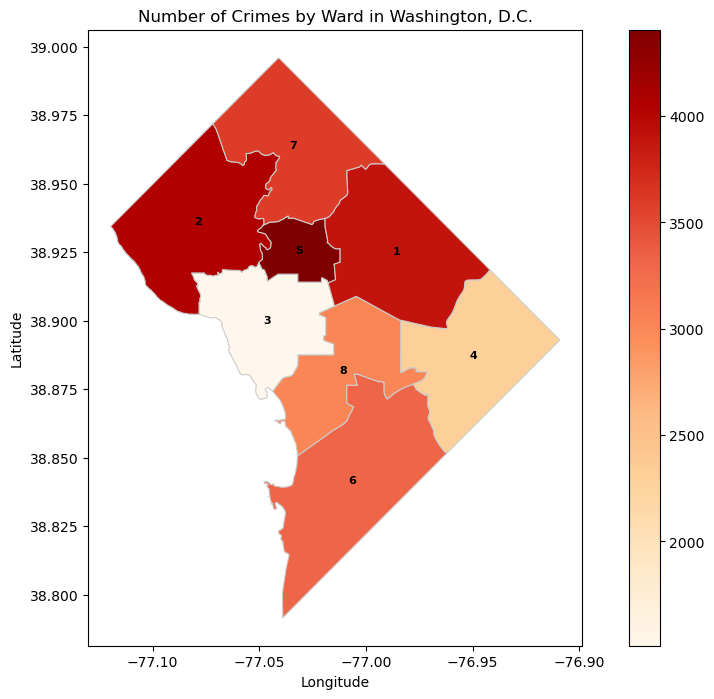

In [245]:
# Creating a new DataFrame that contains the number of crimes in each ward 
grouped_crime_dc = pd.DataFrame(crime_dc.groupby('ward').agg({'ward':'count'})) 

# Renaming the aggregated data column to represent the number of crimes in a ward
grouped_crime_dc.rename(columns={'ward': 'count_of_crimes'}, inplace=True)

# Importing a shapefile to highlight borders of each ward
shapefile_path = 'Wards_from_2022.shp'

# Reading the ward shapefile and creating a GeoDataFrame
gdf = gpd.read_file(shapefile_path)

# Creating the ward column to allow for merging with the crime data that is grouped by ward
gdf['ward']= [6, 8, 4, 3, 5, 1, 2, 7] # Inputting the corresponding ward values based on coordinates

# Merging grouped crime data with the shapefile using the 'ward' column
merged = gdf.merge(grouped_crime_dc, left_on='ward', right_on='ward', how='left')

# Plotting the map
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
merged.plot(column='count_of_crimes', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Annotating the ward names
for x, y, label in zip(merged.geometry.centroid.x, merged.geometry.centroid.y, merged['ward']):
    ax.text(x, y, label, fontsize=8, ha='center', va='center', color='black', weight='bold')


# Adding axes labels and title
ax.set_title('Number of Crimes by Ward in Washington, D.C.')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Displaying the plot
plt.show()

### Observation:

The map shows 8 different wards, each represented by a number from 1 to 8. The color intensity varies across wards, indicating different crime levels. Darker shades represent higher crime numbers, while lighter shades represent lower crime numbers.

Wards 1, 2, 5, and 7 appear to have darker shades compared to others, suggesting higher crime rates. In general, ward 5 has the highest number of crimes, followed by ward 2, ward 1, ward 7, ward 6, ward 8, ward 4 and ward 3. 

This indicates that the areas with the highest crime rates are concentrated in the central and eastern parts of the Washington D.C.. And if we compared to the east, the central part evidently has a higher number of crimes.


### Inference:

1. The central area, with Ward 5 having the highest crime rate, followed by Ward 2 and Ward 1, exhibits elevated crime levels, which can be attributed to several factors. One prominent factor is the higher population density in these districts, as they serve as hubs for residential and commercial activities. Additionally, the increased commercialization in these central wards often leads to a greater influx of people, providing more opportunities for criminal activities to occur.
2. Income levels are often correlated with crime rates, and it's a common finding that higher-income areas tend to have lower crime rates. For instance, Ward 3 and Ward 4 record the lowest crime numbers, which can be plausibly attributed to their proximity to affluent areas near Washington, D.C., such as Bethesda, Chevy Chase, and McLean.  Higher-income areas often have more resources to invest in community infrastructure, including better street lighting, security systems, and neighborhood watch programs, which can deter crime. At the same time, as we can glean from the preceding exploratory data analysis (EDA), theft constitutes the largest proportion within all crime categories. High income areas tend to experience fewer incidents of theft, a factor that significantly contributes to lower crime rates in such regions.

### Recommendations:

1. Focused Policing: Direct more policing efforts to Wards 5, 2, and 1, especially in areas identified as crime hotspots. This could involve an increase in patrols, community policing initiatives, and the use of crime prevention through environmental design (CPTED) strategies[1]. 
2. Community Engagement: Develop community outreach programs in these wards to strengthen relations between law enforcement and residents, and to work on crime prevention from a community standpoint.
3. Economic Development: Invest in economic development initiatives in these wards to address potential underlying socio-economic causes of crime. This could include job training programs, support for local businesses, and investment in affordable housing.
4. Infrastructure Improvements: Invest in infrastructure such as street lighting and public surveillance systems in these wards to help deter criminal activity.

### References

[1] 2023, Crime Prevention through Environmental Design (CPTED), https://crime.baltimorecity.gov/crime-prevention-through-environmental-design-cpted#:~:text=Crime%20Prevention%20through%20Environmental%20Design%20(CPTED%2C%20pronounced%20sep%2Dted,the%20neighborhood%20is%20cared%20for

### 2. Is there a correlation between the number of alcohol outlets and number of crimes that occur in a ward in DC?

In Washington D.C., liquor licenses are administered by the Alcoholic Beverage and Cannabis Administration (ABCA), which is a D.C. government agency. City government officials would be concerned with the relationship between the prevalence of liquor stores on the prevalence of crime as this may influence the number of liquor licenses they choose to issue. In this analysis, we will explore the distribution of liquor licenses among Washington D.C., again displaying the data by ward.

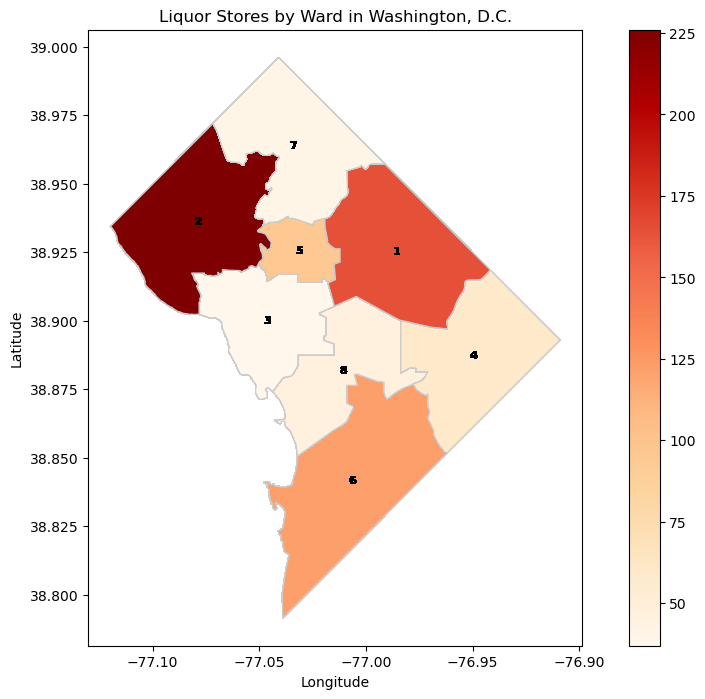

In [265]:
# Importing a shapefile to highlight borders of each ward
shapefile_path = 'Wards_from_2022.shp'

# Reading the ward shapefile and creating a GeoDataFrame
gdf = gpd.read_file(shapefile_path)

# Creating the ward column to allow for merging with the crime data
gdf['ward']= [6, 8, 4, 3, 5, 1, 2, 7] # Inputting the corresponding ward values based on coordinates

# Merging crime data with the shapefile using the 'ward' column
merged = gdf.merge(crime_dc, left_on='ward', right_on='ward', how='left')

# Plotting the map
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
merged.plot(column='liquor_store_count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Annotating the ward names
for x, y, label in zip(merged.geometry.centroid.x, merged.geometry.centroid.y, merged['ward']):
    ax.text(x, y, label, fontsize=8, ha='center', va='center', color='black', weight='bold')


# Adding axes labels and title
ax.set_title('Liquor Stores by Ward in Washington, D.C.')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Displaying the plot
plt.show()

The map of liquor stores by ward in Washington D.C. indicates that ward 2 has the most liquor stores, while wards 3 and 7 have least liquor stores. When comparing the liquor store map to the previous map of the number of crimes per ward, the relationship seems quite weak. While Ward 2 has both high crime and many liquor stores, Ward 5 has the most amount of crime but signicantly less liquor stores. Additionally, Ward 7 has more crime than Ward 4, but Ward 4 has slightly more liquor stores than Ward 7. Based on these visualizations alone, it cannot be said that there is a correlation between liquor store prevalence and crime occurrence in Washington D.C.

### Additional Findings Pertaining to Liqour Store Prevalence
However, when examining variables that may relate crime to liquor store prevalence, it was found that there is a relationship between liquor store prevalence and unemployment in Washington D.C. The following code demonstrates these findings.

> **Indented block**



In [247]:
# Determining the correlation between the number of liquor stores and number of unemployed residents in D.C.
correlation = crime_dc[['liquor_store_count', 'unemp_pop']].corr()
print(correlation)

                    liquor_store_count  unemp_pop
liquor_store_count            1.000000   0.858982
unemp_pop                     0.858982   1.000000


With a r^2 value of 0.858982, we can conclude that there is a strong, positive correlation between liquor store prevalence and the number of unemployed residents in Washington D.C.. Therefore, the more liquor stores there are in a particular area, the higher the unemployed population. How unemployment can relate to crime will be explored later in this analysis, but the strong correlation between liquor stores and unemployment can provide a starting point for further research into the relationship between liquor store proximity and crime in D.C.'s wards.

### Inferences and Reccomendations

A possible explanation as to why the liquor stores are concentrated towards the center of Washington D.C. is because this is where the majority of entertainment and nightlife resides. Downtown D.C. is home to Dupont Circle, Logan Circle, U St, H St, and many other popular areas for residents and tourists. The outer areas of D.C. (Wards 3, 4, 5, 7, and 8) are more residential, with less nightlife and entertainment.

Why would we see high amounts of crime in Ward 5, which has fewer liquor stores than other wards, may be because of other socioeconomic factors, which we aim to identify later in this analysis. However, being able to rule out liquor store prevalence as a main contributer to crime still offers significance in terms of D.C. crime prevention and reduction policies.

Due to the weak relationship between liquor store prevalence and crime, there is insufficient evidence to suggest that the D.C. government should change the number of liquor licenses it issues based on the incidence of crime. Rather, the D.C. government should explore other factors that may impact crime more greatly. With this analysis, the D.C. government can focus more of its time and resources to identifying and addressing more significant drivers of crime.

### 3. How do socioeconomic factors such as income levels and unemployment rates correlate with crime rates in different areas of Washington DC?

**Exploring the Nexus:**

Socioeconomic Factors and Crime Rates in Washington, DC Washington, DC, a city steeped in history and culture, presents a complex urban landscape where various socioeconomic factors intertwine with the dynamics of crime. In this analysis, we delve into the intricate relationship between income levels, unemployment rates, education levels, and crime rates across different wards in the nation's capital.

Understanding the interplay of these factors is crucial not only for policy-makers and urban planners but also for the residents seeking a safer and more prosperous community. By unraveling the patterns and correlations, we aim to shed light on the multifaceted nature of crime in Washington, DC, and explore how socioeconomic conditions may contribute to, or mitigate, crime across various neighborhoods.

As we embark on this analytical journey, we will employ data-driven insights and visualizations to uncover the nuanced connections between socioeconomic indicators and crime rates.

**Exploring Socioeconomic Factors and Crime Rates in Washington, DC**

In this analysis, we aim to explore the intricate relationship between socioeconomic factors and crime rates across different wards in Washington, DC. By merging crime and socioeconomic datasets and employing visualizations, we seek to uncover patterns and correlations that contribute to a deeper understanding of the dynamics at play.

**Data Merging**

We begin by merging crime and socioeconomic data using the ward as a common identifier

**Correlation Analysis**

Next, we perform a correlation analysis using Seaborn to understand the relationship between key socioeconomic indicators and crime rates.


In [248]:
crimes_by_ward=crime_dc.groupby('ward')['offense'].count().reset_index()
num_bins = 5

# Create bins using cut with specified number of bins
crime_dc['income_bins'] = pd.cut(crime_dc['Median_family_income($)'], bins=num_bins)

# Group by bins and offense, then count occurrences
result = crime_dc.groupby(['income_bins']).size().reset_index(name='count')

# Display the result
print(result)
result['mid']=result['income_bins'].apply(lambda x : (x.left + x.right)/2)
correlation = result['mid'].corr(result['count'])
print(correlation)
unemp_by_ward = crime_dc.groupby('ward')['unemp_pop'].mean().reset_index()
unemp_by_ward=unemp_by_ward.merge(crimes_by_ward,left_on='ward', right_on='ward', how='left')
correlation = unemp_by_ward['unemp_pop'].corr(unemp_by_ward['offense'])
print(correlation)
no_insurance = crime_dc.groupby('ward')['unemp_pop_no_health_insurance_coverage','income_bins'].mean().reset_index()
no_insurance=no_insurance.merge(crimes_by_ward,left_on='ward', right_on='ward', how='left')
correlation = no_insurance['unemp_pop_no_health_insurance_coverage'].corr(no_insurance['offense'])
print(correlation)
crime_dc.columns

            income_bins  count
0  (30340.362, 44739.6]   6618
1    (44739.6, 59067.2]   6698
2    (59067.2, 73394.8]   3890
3    (73394.8, 87722.4]   3315
4   (87722.4, 102050.0]   5570
-0.5575562624344303
0.322774289793836
0.37657941908142606


Index(['neighborhood_cluster', 'offense_group', 'census_tract', 'end_date',
       'offense_text', 'shift', 'district', 'yblock', 'ward', 'offensekey',
       'sector', 'psa', 'ucr_rank', 'block_group', 'voting_precinct', 'xblock',
       'block', 'start_date', 'ccn', 'offense', 'anc', 'report_date', 'method',
       'latitude', 'longitude', 'tot_pop', 'unemp_pop',
       'Median_family_income($)', 'unemp_pop_no_health_insurance_coverage',
       'liquor_store_longitude', 'liquor_store_latitude', 'liquor_store_count',
       'date', 'Date_time', 'Max_Temp', 'Min_Temp', 'Avg', 'Departure', 'HDD',
       'CDD', 'Precipitation', 'New Snow', 'Snow Depth', 'income_bins'],
      dtype='object')

### Geographic Visualization

To visualize our findings geographically, we employ Geopandas and Plotly Express. We load ward boundaries or centroids, calculate central coordinates, and merge the data.

### Interactive Map

Finally, we create an interactive map using Plotly Express, displaying the relationship between median income, crime rates, and ward locations


   ward  centroid_lat  centroid_lon
0     1     38.841672    -77.006314
1     2     38.881881    -77.010803
2     3     38.887188    -76.949425
3     4     38.900042    -77.046357
4     5     38.925518    -77.031414
5     6     38.925422    -76.985496
6     7     38.936375    -77.078987
7     8     38.963836    -77.034146


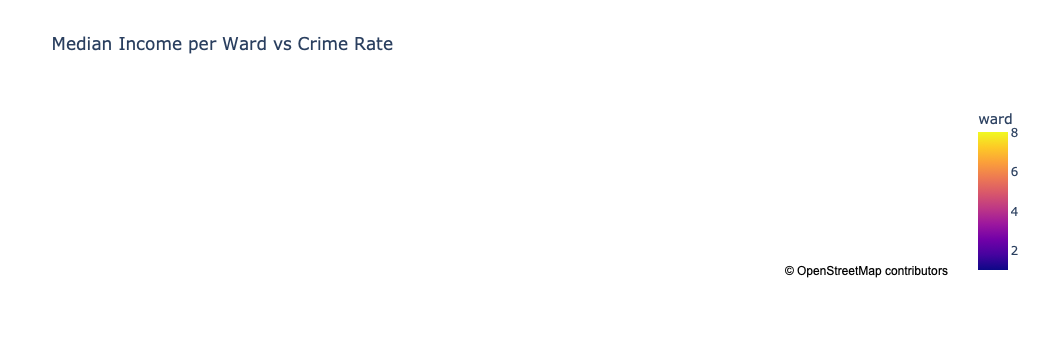

In [249]:
# Load crime data
visual = crime_dc.groupby('ward')['unemp_pop_no_health_insurance_coverage', 'Median_family_income($)', 'unemp_pop'].mean().reset_index()
visual = visual.merge(crimes_by_ward, left_on='ward', right_on='ward', how='left')

# Load geographic data
file_path = 'Wards_from_2022.shp'
gdf = gpd.read_file(file_path)

# Calculate centroid coordinates
gdf['centroid'] = gdf['geometry'].centroid
gdf['centroid_lat'] = gdf['centroid'].y
gdf['centroid_lon'] = gdf['centroid'].x

# Assign ward numbers
gdf['ward'] = gdf.index + 1
print(gdf[['ward', 'centroid_lat', 'centroid_lon']])

# Merge geographic data with crime data
visual = visual.merge(gdf, left_on='ward', right_on='ward', how='left')

# Mapbox token for Mapbox API access
mapbox_token = 'pk.eyJ1Ijoic3NoaXZhbSIsImEiOiJjbHA0cnJ0cXoxNm5iMmlvYjhxcnFjZm10In0.miOfR0N1V4R8yE7OLBYglw'

# Create scatter map using Plotly Express
fig = px.scatter_mapbox(
    visual,
    lat='centroid_lat',
    lon='centroid_lon',
    color='ward',
    size='offense',
    hover_data=['ward', 'Median_family_income($)', 'offense'],
    title='Median Income per Ward vs Crime Rate',
    labels={'Median_family_income($)': 'Median Income', 'offense': 'Crime Rate'},
    size_max=15,  # Adjust the maximum size of the bubbles
    mapbox_style='open-street-map',  # You can choose a different map style
    zoom=11,  # Adjust the initial zoom level
    center=dict(lat=38.9174, lon=-77.0310)  # Set the initial center of the map (average values for Washington D.C.)
)

# Update layout with Mapbox access token
fig.update_layout(mapbox=dict(accesstoken=mapbox_token))

# Display the interactive map
fig.show()


### 4. Does the temperature of the day have an impact on the number of crimes?

### Exploring the Relationship Between Temperature and Crime in DC

### Introduction:
Crime is a complex societal issue impacted by many factors. Prior research has suggested weather and temperature may influence criminal activity, but the exact relationship is unclear. In this analysis, we explore crime data for Washington DC to examine if outdoor temperature has an observable effect on the number of crimes.

The Data
The dataset contains details on over 26,000 crimes committed in DC over the past year, recording information like crime type, location, date, and temperature on the day. We focus specifically on analyzing daily temperature data (in fahrenheit) compared to the total number of crimes per day.

Analytical Approach

To study the temperature-crime relationship, we:

- Aggregated the crime data by date to calculate total daily crimes
- Merged in the average temperature for each day
- Visualized the correlation using an interactive scatter plot with a linear regression trendline

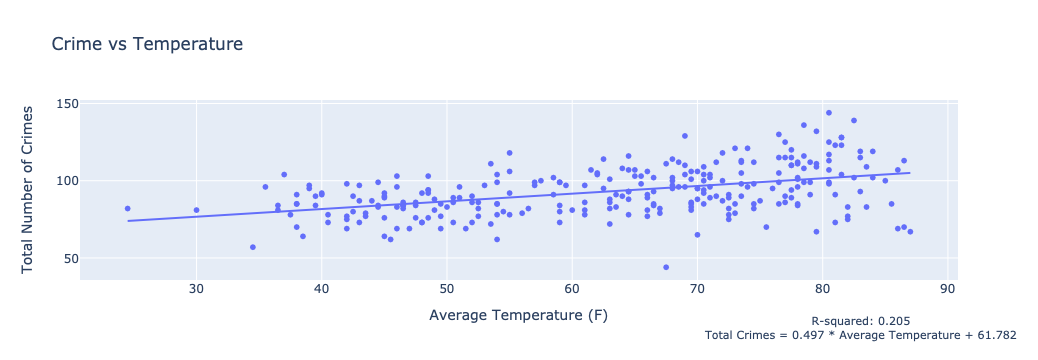

In [250]:
# Extract relevant columns
crime_temp_data = crime_dc[['date', 'Max_Temp', 'Min_Temp', 'Avg']]

# Group data by date and calculate the total number of crimes and average temperature for each day
daily_crime_temp = crime_temp_data.groupby(['date', 'Max_Temp', 'Min_Temp', 'Avg']).size().reset_index(name='total_crimes')

# Create an interactive scatter plot with plotly express
fig = px.scatter(daily_crime_temp, x='Avg', y='total_crimes',
                 labels={'total_crimes': 'Total Number of Crimes', 'Avg': 'Average Temperature (F)'},
                 title='Crime vs Temperature',
                 trendline='ols',  # Ordinary Least Squares regression line
                 )

# Get the regression results using statsmodels
X = sm.add_constant(daily_crime_temp['Avg'])
y = daily_crime_temp['total_crimes']
model = sm.OLS(y, X).fit()

# Extract the R-squared value and coefficients
rsquared = model.rsquared
slope, intercept = model.params

# Create equation of the line
equation = f'Total Crimes = {intercept:.3f} * Average Temperature + {slope:.3f}'

# Add R-squared and equation to legend using annotations with reduced font size
fig.update_layout(
    annotations=[
        dict(
            x=1.07,
            y=-0.35,
            xref='paper',
            yref='paper',
            text=f'R-squared: {rsquared:.3f}<br>{equation}',
            showarrow=False,
            align='center',
            font=dict(size=11.1)  # Adjust the font size as needed
        )
    ]
)

# Show the interactive plot
fig.show()

### Observable Relationship Between Temperature and Total Crimes

- Crime vs Temperature Plot

The interactive scatter plot shows the correlation between average temperature and total crimes.
We make a few key observations:

There is a slight positive correlation between temperature and number of crimes, with an R-squared value of 0.20. Warmer days see more crimes on average.
The trendline shows roughly 0.5 more crimes per degree increase in average temperature.
Total crimes range from aroud 75/day in the winter to over 100/day in the summer. A difference of 25-30 crimes comparing cold and hot days.

- Interpretation of Results

The analysis indicates a measurable increase in criminal activity on warmer days. Some inferences that can be made from this relationship:

1. Warmer weather leads more people to be outside, increasing opportunities for crime.
2. Heat and discomfort may agitate violent behavior or motivate crimes of desperation.
3. Many hospitality and tourism jobs are seasonal. Losing employment or pay cuts when seasonal work ends in the fall could motivate financially desperate crimes.

However, temperature is clearly not the only factor - the variability along the trendline highlights the complexity of predicting crime based on weather alone. Exploring additional socioeconomic factors could shed more light on causes of crime patterns.


After some prior research on this topic, I found that

>Seasonal patterns in violent crimes: A 2014 report by the _Bureau of Justice Statistics_ revealed that violent crimes, including murder, rape, and aggravated assault, are more likely to occur during the summer compared to other seasons.

>Effect of high heat on inmates: A 2021 report from the _National Bureau of Economic Research_ observed an 18% increase in violence among inmates on days with high heat in 36 correctional facilities. This is attributed to elevated body temperature, heart rate, and blood pressure, causing discomfort that may contribute to increased anger and violence.

> More free time during summer: _Gifford’s Law Center_ suggests that increased free time during the summer provides more opportunities for criminal activities, especially among youth who are out of school.

So our analysis is aligned with expectations from prior criminology research!
And provides supporting evidence that warmer temperatures in DC contribute to slightly higher rates of crime.

### 5. Is there an association between the time of day a crime that a crime occurred and the type of crime?

According to the dataset, there are various police shifts in which each crime was reported. The following code will provide the different police shifts.

In [251]:
crime_dc['shift'].unique()

array(['midnight', 'day', 'evening'], dtype=object)

Based on the above output, there are 3 different police shifts: <b> midnight, day, and evening.   
- midnight: midnight - 8:00AM
- day: 8:00AM - 4:00PM
- evening: 4:00PM - midnight

The following visualizaiton will be created to display the frequency of reported crime during each police shift.

In [252]:
crime_dc['offense'].value_counts().sort_values(ascending=True)

ARSON                            9
SEX ABUSE                      123
HOMICIDE                       214
BURGLARY                       821
ASSAULT W/DANGEROUS WEAPON    1110
ROBBERY                       2668
MOTOR VEHICLE THEFT           5429
THEFT F/AUTO                  5880
THEFT/OTHER                   9837
Name: offense, dtype: int64

In [253]:
# Grouping crimes by shift and arranging them from highest frequency to lowest frequency
crime_dc['shift'].value_counts().sort_values(ascending=True)

midnight     6165
day          9838
evening     10088
Name: shift, dtype: int64

In [254]:
# Create a pivot table with 'Category' as index, 'TimeOfDay' as columns, and 'Value' as values
pivot_table = pd.pivot_table(crime_dc, values='ccn', index='offense', columns='shift', aggfunc='count', fill_value=0)
pivot_table_percent = (pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100).round(1)
pivot_table_percent['count'] = crime_count
pivot_table_percent.reset_index(inplace=True)
print(pivot_table_percent)

shift                     offense   day  evening  midnight  count
0                           ARSON  55.6     33.3      11.1      9
1      ASSAULT W/DANGEROUS WEAPON  18.3     34.1      47.7   1110
2                        BURGLARY  44.7     27.2      28.1    821
3                        HOMICIDE   0.0      0.0     100.0    214
4             MOTOR VEHICLE THEFT  40.7     37.2      22.1   5429
5                         ROBBERY  18.1     33.1      48.9   2668
6                       SEX ABUSE  18.7     47.2      34.1    123
7                    THEFT F/AUTO  42.6     39.1      18.3   5880
8                     THEFT/OTHER  41.2     42.9      15.9   9837


In [259]:
fig = px.bar(
    pivot_table_percent,
    x="offense",
    y=["day", "evening", "midnight"],
    title="Percent of crime by offense during each shift",
    text_auto=True,
    height=650,
    labels={'value': 'Percentage'},
)
fig.update_layout(
    yaxis=dict(
        range=[0, 110]  # Setting the y-axis range from 0 to the calculated max
    )
)
# Adding annotations for each bar
for index, row in pivot_table_percent.iterrows():
    fig.add_annotation(
        x=row['offense'],
        y=105,  # Adjust this offset as needed
        text=str(row['count']),
        showarrow=False,
        font=dict(size=12)
    )
fig.show()

TypeError: bar() got an unexpected keyword argument 'text_auto'

In [266]:
import plotly.express as px

# Your data and pivot_table_percent here...

fig = px.bar(
    pivot_table_percent,
    x="offense",
    y=["day", "evening", "midnight"],
    title="Percent of crime by offense during each shift",
    height=650,
    labels={'value': 'Percentage'},
    textposition='auto'  # Automatically position text on the bars
)

fig.update_layout(
    yaxis=dict(
        range=[0, 110]  # Setting the y-axis range from 0 to the calculated max
    ),
)

fig.show()

TypeError: bar() got an unexpected keyword argument 'textposition'

### Observations
The bar graph represents the distribution of various crime types across three shifts: day, evening, and midnight. Assaults with a dangerous weapon predominantly occur during the evening shift (47.7%), while thefts/auto are most frequent during the day (42.6%). Homicides are exclusively reported during the midnight shift (100%). The least variation across shifts is seen in robberies, with a more even distribution. The total count of crimes for each type is indicated above the respective bars, with theft/other having the highest frequency (9837). The data suggests a correlation between the time of day and the prevalence of certain crime types.

### Inferences
The above visualization demonstrates that crimes related to theft (theft f/auto, theft/other, burglary, motor vehicle theft) primarily occur during the day shift. This may be many people may be at work or school shift, allowing for breakins to occur when people are away from their residences or vehicles. People may also be out shopping, working, or running errands during the day, which can leave their cars unattended or vulnerable to theft. It might also be because they are less likely to encounter police patrols or security guards during the day, which reduces the chance of being caught. By stealing automobiles theives might also commit serious crimes without getting caught.

More serious crimes such as homicide, assault with a dangerous weapon, and robbery occur when during the midnight shift. These crimes are highly confrontational and threatening; they may be done in the midnight as there less people out and people may also be out drinking, partying, or socializing at night, which can impair their judgment, lower their inhibitions, and increase their vulnerability to violence.  According to a report by the Australian Institute of Criminology, the night-time economy, which involves the provision of entertainment, leisure, and hospitality services at night, can generate various forms of stress and conflict, such as noise, crowding, competition, and intoxication. These factors can increase the likelihood of aggression, violence, and crime among patrons, staff, and residents.

### Recommendations
These insights can be valuable for law enforcement and public safety officials to understand the distribution of crime across different times of the day and to allocate resources accordingly. To understand the distribution of the types of crimes across different police shifts, law enforcement can staff and prepare their teams appropriately for these shifts. Since more than half of the overall crime occurs during the day shift, perhaps increased patrolling may be needed to lower the incidence of thefts. The police can do this by increasing lighting, surveillance, signage, and patrols, and by enforcing policies and laws that prohibit and punish these crimes. 

Furthermore, increased response preparedness for violent crimes, which primarily occur in the midnight shift, can help improve officer safety and efficiency of a police response. Ultimately, D.C. law enforcement can utilize the insights from this analysis to cultivate plans that help them in their efforts to reduce and quickly respond to crime.

Civilians can stay safe by avoiding walking alone at night in isolated areas, carrying pepper spray, whistle or any self defense device 


### 6. Can we predict future crime rates or hotspots based on historical data and identified patterns?

### Enhancing Community Safety with Predictive Crime Analysis

In Washington, DC, we're using data analysis to make neighborhoods safer. Our project predicts crime in different areas, helping the police and city leaders make better decisions.

**Making Policing Smarter**

Our system finds areas with more crime, so police can focus there. This helps them be proactive, responding faster to keep everyone safe.

**Stopping Crime Before It Happens**
We use the data to stop crime before it even starts. By knowing where crime might happen, we can take steps to prevent it. This means a safer city for all of us.

**Giving Power to the People**

People living and working in DC can now make informed choices. They know where it's safer and can work with the police to keep their communities secure.

**Better Rules for Each Neighborhood**

Our insights help city leaders create rules that fit each neighborhood. This way, policies are more effective because they're made with each community in mind.

**Faster Help in Emergencies**

Our system helps emergency services know where they might be needed most. This means they can respond quickly and help people faster in areas where crime is more likely.

**Smart Decision-Making with Data**

We find hidden patterns in the data, helping leaders make better choices. This way, decisions are based on facts, making our strategies more effective.

**Everyone Plays a Role**

Talking openly about crime and how to prevent it gets everyone involved. When the community and the police work together, we make our neighborhoods safer for everyone.

In nutshell, our project levarages data to make smart choices and build a safer future for Washington, DC.


In [256]:
# Convert 'report_date' to datetime format
crime_dc['report_date'] = pd.to_datetime(crime_dc['report_date'])

# Extract month and year from 'report_date'
crime_dc['month'] = crime_dc['report_date'].dt.month
crime_dc['year'] = crime_dc['report_date'].dt.year
crime_dc['week'] = crime_dc['report_date'].dt.isocalendar().week
# Group data by 'ward', 'year', and 'month', and aggregate relevant statistics
grouped_data = crime_dc.groupby(['ward', 'year', 'month']).agg({
    'offense': 'count',      # Count the number of offenses
    'latitude': 'mean',      # Mean latitude
    'longitude': 'mean'      # Mean longitude
}).reset_index()
grouped_data
# grouped_data[grouped_data['ward']==5]

,ward,year,month,offense,latitude,longitude
0,1,2023,1,372,38.922759,-77.030622
1,1,2023,2,399,38.923241,-77.031128
2,1,2023,3,340,38.923740,-77.030967
3,1,2023,4,385,38.923246,-77.030556
4,1,2023,5,442,38.923766,-77.031474
...,...,...,...,...,...,...
75,8,2023,6,356,38.851020,-76.990111
76,8,2023,7,353,38.852799,-76.990776
77,8,2023,8,391,38.851005,-76.991276
78,8,2023,9,317,38.851589,-76.992197


In [257]:
# Define the feature columns for the model
feature_columns = ['latitude', 'longitude', 'year', 'month']

# Extract features (X) and target variable (y) from the grouped_data DataFrame
X = grouped_data[feature_columns]
y = grouped_data['offense']

# Display the selected feature columns
print(grouped_data[feature_columns])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the RandomForestRegressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model performance using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Create a DataFrame for prediction with new data
file_path = 'Wards_from_2022.shp'
gdf = gpd.read_file(file_path)

# Calculate centroid coordinates
gdf['centroid'] = gdf['geometry'].centroid
gdf['centroid_lat'] = gdf['centroid'].y
gdf['centroid_lon'] = gdf['centroid'].x

# Assign ward numbers
gdf['ward'] = gdf.index + 1

data_for_prediction = pd.DataFrame()
data_for_prediction[['latitude', 'longitude']] = gdf[['centroid_lat', 'centroid_lon']]
data_for_prediction['year'] = 2024
data_for_prediction['month'] = 1
# data_for_prediction['week'] = 1
# Standardize the new data
new_data_scaled = scaler.transform(data_for_prediction[feature_columns])

# Make predictions on the new data
predictions = model.predict(new_data_scaled)

# Round up the predicted number of offenses and update the DataFrame
data_for_prediction['predicted_num_offenses'] = predictions
data_for_prediction['predicted_num_offenses'] = data_for_prediction['predicted_num_offenses'].apply(np.ceil)

# Display the DataFrame with predictions
print(data_for_prediction)

     latitude  longitude  year  month
0   38.922759 -77.030622  2023      1
1   38.923241 -77.031128  2023      2
2   38.923740 -77.030967  2023      3
3   38.923246 -77.030556  2023      4
4   38.923766 -77.031474  2023      5
..        ...        ...   ...    ...
75  38.851020 -76.990111  2023      6
76  38.852799 -76.990776  2023      7
77  38.851005 -76.991276  2023      8
78  38.851589 -76.992197  2023      9
79  38.854952 -76.992217  2023     10

[80 rows x 4 columns]
Mean Squared Error: 549.5760874999999
    latitude  longitude  year  month  predicted_num_offenses
0  38.841672 -77.006314  2024      1                   315.0
1  38.881881 -77.010803  2024      1                   324.0
2  38.887188 -76.949425  2024      1                   364.0
3  38.900042 -77.046357  2024      1                   375.0
4  38.925518 -77.031414  2024      1                   350.0
5  38.925422 -76.985496  2024      1                   380.0
6  38.936375 -77.078987  2024      1                   1

### Results

The predictions are for a specific month (January 2024), which allows for temporal analysis. Understanding monthly variations in crime rates can help authorities anticipate and respond to seasonal trends or events that may influence criminal activity.

In concluding our data analysis  on predicting crimes in January 2024, we find assurance in the moderately low Mean Squared Error (MSE) of 549.58. While our model currently provides reasonably accurate predictions based on features such as latitude, longitude, year, and month, we acknowledge the inherent uncertainties in forecasting complex phenomena like crime. The moderate MSE signals room for improvement, and we recognize the potential for refining our model with more extensive training data.

As we move forward, our commitment lies in continuous enhancement. Obtaining additional data will be pivotal in strengthening the model's predictive capabilities, fostering a more nuanced understanding of the factors influencing crime rates.

This underscores the iterative nature of our project, where ongoing refinement is key to delivering more accurate and insightful predictions for effective decision-making in the realm of public safety.

### Project Conclusion: Unveiling Patterns, Impacting Lives

In the realm of data exploration and analysis, our systematic inquiry into weather, socioeconomic factors, liquor store prevalence, and crime patterns in Washington, DC, has revealed meaningful insights that resonate across three essential stakeholder groups: Community members, Law Enforcement, and Government.

### 1. High Temperatures,  higher the crime

**Why Stakeholders Should note:**
   - **Community Members:** Warmer temperatures correlate with increased crime, impacting daily routines and safety perceptions.
   - **Law Enforcement:** Understanding seasonal patterns aids in resource allocation and strategic planning.
   - **Government:** Seasonal crime trends inform policy decisions, emphasizing the need for targeted interventions during warmer months.

**Impact on Stakeholders' Lives:**
   - **Community Members:** Greater awareness during warmer seasons empowers residents to take proactive safety measures.
   - **Law Enforcement:** Enhanced resource deployment during peak crime periods improves law enforcement effectiveness.
   - **Government:** Informed policies contribute to a safer and more secure urban environment.

### 2. Lowered Household Income & Lower Unemployment, higher the crime

**Why Stakeholders Should note:**
   - **Community Members:** Socioeconomic challenges exacerbate crime rates, influencing neighborhood dynamics.
   - **Law Enforcement:** Recognizing the correlation aids in crime prevention strategies tailored to economic conditions.
   - **Government:** Addressing economic disparities becomes crucial for overall crime reduction and community well-being.

**Impact on Stakeholders' Lives:**
   - **Community Members:** Economic empowerment initiatives foster safer communities and a higher quality of life.
   - **Law Enforcement:** Targeted interventions address root causes, fostering community trust and cooperation.
   - **Government:** Socioeconomic policies become integral to crime reduction, shaping a more equitable cityscape.

### 3. Liquor Store Prevalence and Crime
Despite a thorough investigation, our analysis revealed that there isn’t a significant correlation between liquor store prevalence and crime rates in Washington, DC. The examination of the datasets did not demonstrate a clear pattern suggesting that areas with higher liquor store density experience a corresponding increase in crime prevalence.

**Why Stakeholders should note:**
   - **Community Members:** Understanding the absence of a direct link helps dispel potential misconceptions and fosters a more nuanced understanding of neighborhood dynamics.
   - **Law Enforcement:** The absence of a clear correlation allows for a focus on other factors contributing to crime, guiding law enforcement efforts more effectively.
   - **Government:** Regulatory decisions related to liquor store licensing should be informed by evidence, and this analysis provides insights into the lack of a straightforward relationship between liquor store prevalence and crime.

**Impact on Stakeholders' Lives:**
   - **Community Members:** Knowledge of the nuanced relationship between liquor store prevalence and crime fosters informed community discussions and initiatives.
   - **Law Enforcement:** Focusing on multifaceted approaches to crime prevention becomes essential, ensuring resources are allocated where they can have the most impact.
   - **Government:** Evidence-based policymaking becomes paramount, considering various factors beyond liquor store prevalence to address crime effectively.

This nuanced understanding encourages stakeholders to look beyond simplistic associations, fostering a more informed and targeted approach to addressing crime in Washington, DC.
### 4. Shift Analysis: Midnight Shift vs. Day Shift

**Why Stakeholders Should note:**
   - **Community Members:** Awareness of crime patterns during different shifts enhances personal safety awareness.
   - **Law Enforcement:** Tailoring patrol strategies based on shift-specific crime types improves law enforcement effectiveness.
   - **Government:** Shift-specific crime insights inform urban planning and resource allocation.

**Impact on Stakeholders' Lives:**
   - **Community Members:** Informed decisions about daily routines contribute to a safer living environment.
   - **Law Enforcement:** Efficient resource allocation during specific shifts improves crime response times.
   - **Government:** Urban planning incorporates shift-specific crime patterns, fostering safer and more resilient neighbourhoods.

### Overall Impact

Through our meticulous examination of these diverse findings, it becomes evident that stakeholders—whether individuals navigating daily life, law enforcement ensuring public safety, or policymakers shaping the urban landscape—can derive significant benefits from these data-driven insights. These revelations offer a roadmap for targeted interventions, fostering a city where safety, equity, and well-being converge. By understanding the intricacies of crime dynamics, stakeholders can collectively contribute to a Washington, DC, that is not just secure but thriving.
